# **Data Cleaning**

## Objectives

* Data Analysis with ProfileReport
* Correlation and PPS Study
* In-depth Assessment of Missing Data
* Imputation Techniques for Missing Data
* Train and Test Set Partitioning

## Inputs

* outputs/datasets/collection/housing_records.csv

## Outputs

* Generate cleaned train and test sets, saved under outputs/datasets/cleaning

In [1]:
# Import necessary packages and libraries for data analysis and visualization
import os  # For file system operations
import pandas as pd  # For data manipulation and analysis
from ydata_profiling import ProfileReport  # For generating data profiles
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For creating static plots
import seaborn as sns  # For creating informative and attractive statistical graphics
sns.set_style("darkgrid")  # Set the seaborn style to darkgrid for better visualization

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analytics/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

---

# Load Data:

Load Data

In [4]:
# Specify the path to the raw data file
data_raw_path = "outputs/dataset/housing_records.csv"

# Read the raw data into a pandas DataFrame
data = pd.read_csv(data_raw_path)

# Preview the first 3 rows of the data
data.head(3)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   

   BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0        150            0.0         548          RFn  ...         65.0   
1        284            NaN         460          RFn  ...         80.0   
2        434            0.0         608          RFn  ...         68.0   

   MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  WoodDeckSF  \
0       196.0          61            5            7          856         0.0   
1         0.0           0            8            6         1262         NaN   
2       162.0          42            5            7          920         NaN   

   YearBuilt  YearRemodAdd  SalePrice  
0       2003          2003     208500  
1       1976          1976     181500  
2       2001          2002     223500  

[3 rows x 24 columns]

---

# Data Exploration:

Distribution of Numerical features

In [5]:
from pandas_profiling import ProfileReport

# Create a pandas profiling report
pandas_report = ProfileReport(data, minimal=True)

# Display the report in a Jupyter notebook iframe
pandas_report.to_notebook_iframe()

/tmp/ipykernel_5331/697581042.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

---

# Correlation and PPS Analysis: 

Correlation matrix

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspa



* Evaluate how your target variable is correlated with other variables (features and target)
* Analyze multicollinearity, that is, how features are correlated among themselves


*** Heatmap: Spearman Correlation ***
This assesses monotonic relationships 



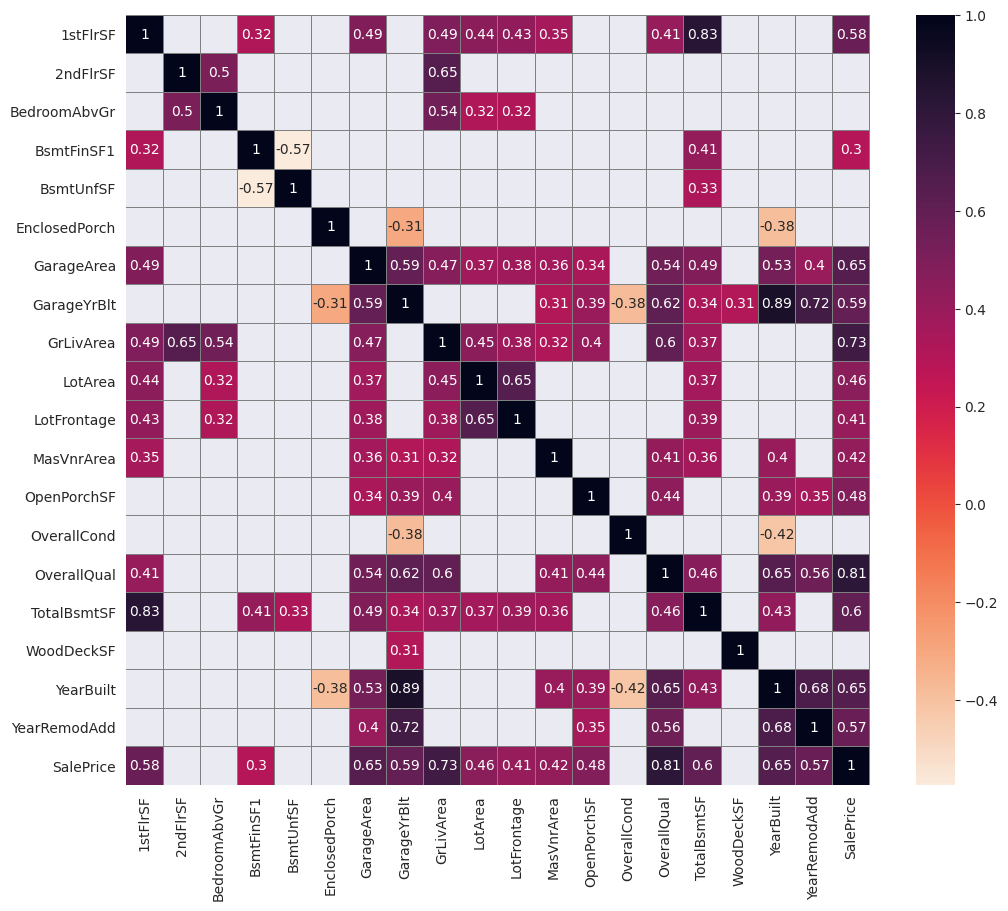



*** Heatmap: Pearson Correlation ***
This assesses the linear relationship between two continuous variables 



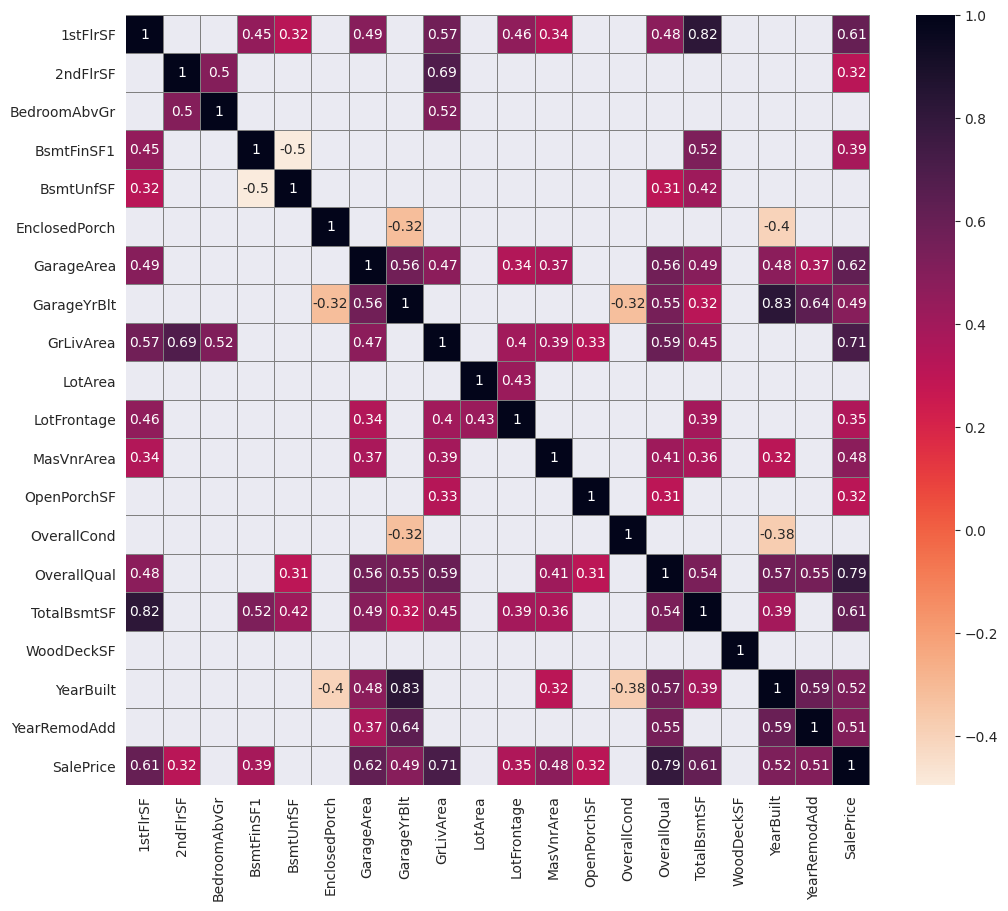



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



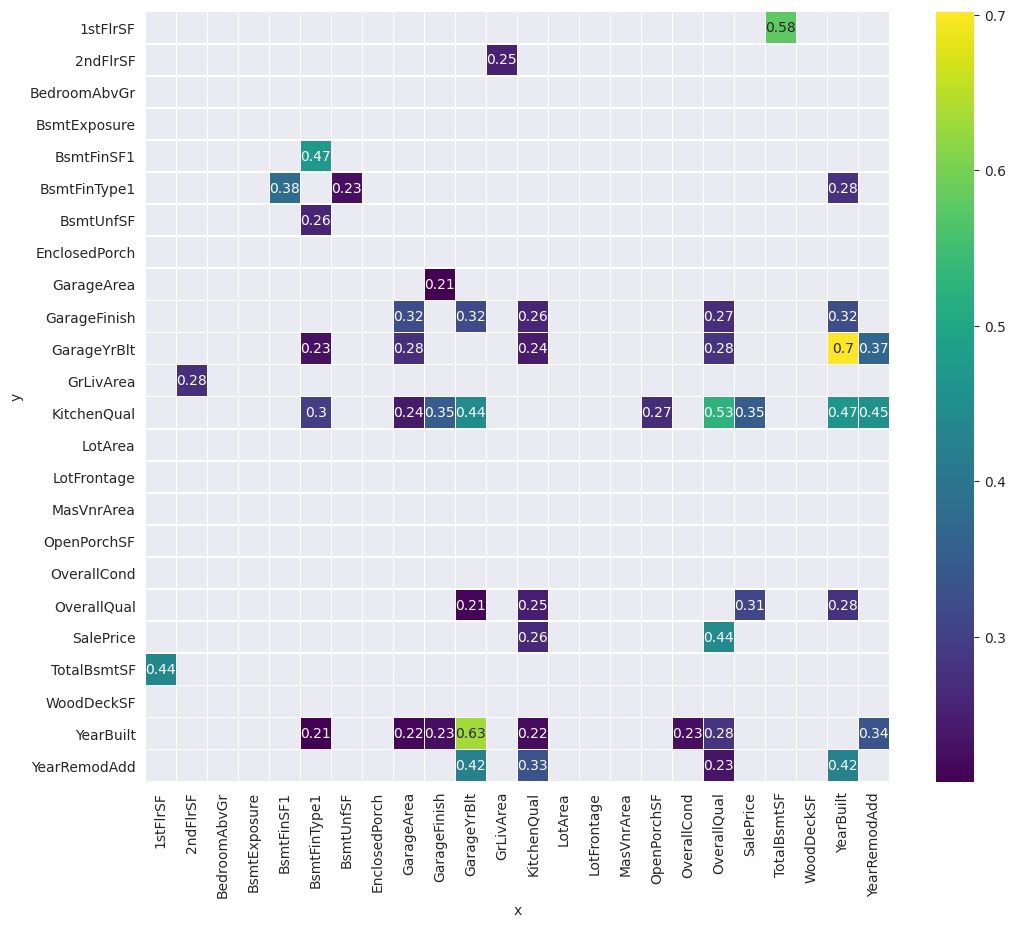

In [7]:
from ppscore import score as pps

def generate_pps_heatmap(data, threshold, figsize, font_size):
    """
    Generate a heatmap to visualize the Power Predictive Score (PPS) between variables.
    
    Parameters:
    data (pandas.DataFrame): The input data
    threshold (float): The threshold value for masking
    figsize (tuple): The figure size
    font_size (int): The font size for annotations
    """
    if isinstance(data, dict):
        data = pd.DataFrame(data)
    
    # Create a mask to hide values below the threshold
    mask = np.zeros_like(data, dtype=bool)
    mask[np.abs(data.values) < threshold] = True  # Use data.values to get the numerical array
    
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=figsize)

    # Generate the heatmap using seaborn
    sns.heatmap(data, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_size}, ax=ax,
                linewidth=0.5)

    # Set the y-axis tick labels
    ax.set_yticklabels(data.columns, rotation=0)

    # Set the y-axis limits
    plt.ylim(len(data.columns), 0)

    # Show the plot
    plt.show()

def generate_heatmap(data, threshold, figsize, font_size):
    """
    Generate a heatmap to visualize correlation matrices.
    
    Parameters:
    data (pandas.DataFrame): The input data
    threshold (float): The threshold value for masking
    figsize (tuple): The figure size
    font_size (int): The font size for annotations
    """
    if len(data.columns) > 1:
        # Create a mask to hide values below the threshold
        mask = np.zeros_like(data, dtype=bool)
        mask[abs(data) < threshold] = True

        # Create a figure and axis object
        fig, ax = plt.subplots(figsize=figsize)

        # Generate the heatmap using seaborn
        sns.heatmap(data, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='rocket_r', annot_kws={"size": font_size},
                    linewidth=0.05, linecolor='grey')

        # Set the y-axis limits
        plt.ylim(len(data.columns), 0)

        # Show the plot
        plt.show()

def compute_correlations_and_pps(data):
    # Compute the Pearson correlation matrix
    corr_pearson = data.corr(method="pearson")

    # Compute the Spearman correlation matrix
    corr_spearman = data.corr(method="spearman")

    # Compute the PPS matrix
    pps_matrix_raw = []
    for x in data.columns:
        for y in data.columns:
            if x != y:
                pps_score = pps(data, x, y)['ppscore']
                pps_matrix_raw.append({'x': x, 'y': y, 'ppscore': pps_score})
    pps_matrix_raw = pd.DataFrame(pps_matrix_raw)
    pps_matrix = pps_matrix_raw.pivot(index='y', columns='x', values='ppscore')

    return corr_pearson, corr_spearman, pps_matrix

def display_correlation_and_pps(pearson_corr, spearman_corr, pps_matrix, corr_threshold, pps_threshold,
                                figsize=(20, 12), font_size=8):
    """
    Display the correlation and PPS heatmaps.
    
    Parameters:
    pearson_corr (pandas.DataFrame): The Pearson correlation matrix
    spearman_corr (pandas.DataFrame): The Spearman correlation matrix
    pps_matrix (pandas.DataFrame): The PPS matrix
    corr_threshold (float): The threshold value for correlation heatmap
    pps_threshold (float): The threshold value for PPS heatmap
    figsize (tuple): The figure size
    font_size (int): The font size for annotations
    """
    print("\n")
    print("* Evaluate how your target variable is correlated with other variables (features and target)")
    print("* Analyze multicollinearity, that is, how features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("This assesses monotonic relationships \n")
    generate_heatmap(data=spearman_corr, threshold=corr_threshold, figsize=figsize, font_size=font_size)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("This assesses the linear relationship between two continuous variables \n")
    generate_heatmap(data=pearson_corr, threshold=corr_threshold, figsize=figsize, font_size=font_size)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print("PPS detects linear or non-linear relationships between two columns.\n"
          "The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    generate_pps_heatmap(data=pps_matrix, threshold=pps_threshold, figsize=figsize, font_size=font_size)

pearson_corr, spearman_corr, pps_matrix = compute_correlations_and_pps(data)
display_correlation_and_pps(pearson_corr, spearman_corr, pps_matrix, corr_threshold=0.3, pps_threshold=0.2, figsize=(12, 10), font_size=10)

In [8]:
# Compute the correlations and PPS matrix
pearson_corr, spearman_corr, pps_matrix = compute_correlations_and_pps(data)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspa



* Evaluate how your target variable is correlated with other variables (features and target)
* Analyze multicollinearity, that is, how features are correlated among themselves


*** Heatmap: Spearman Correlation ***
This assesses monotonic relationships 



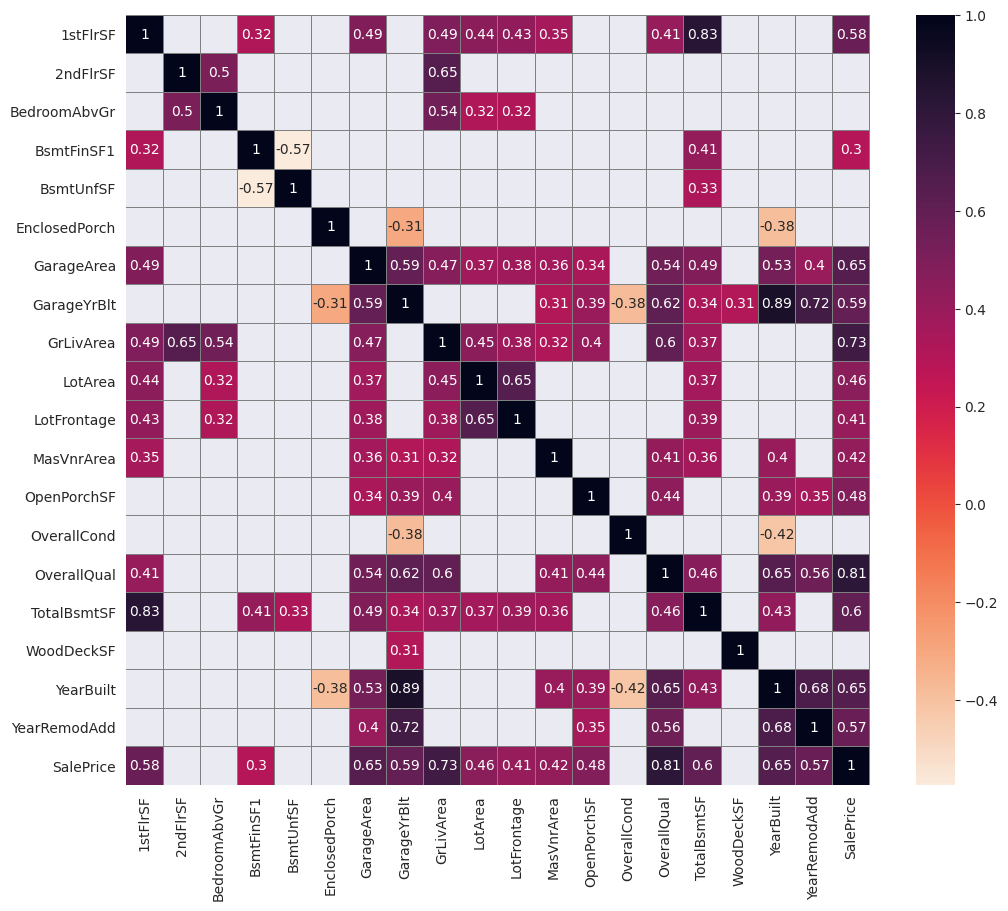



*** Heatmap: Pearson Correlation ***
This assesses the linear relationship between two continuous variables 



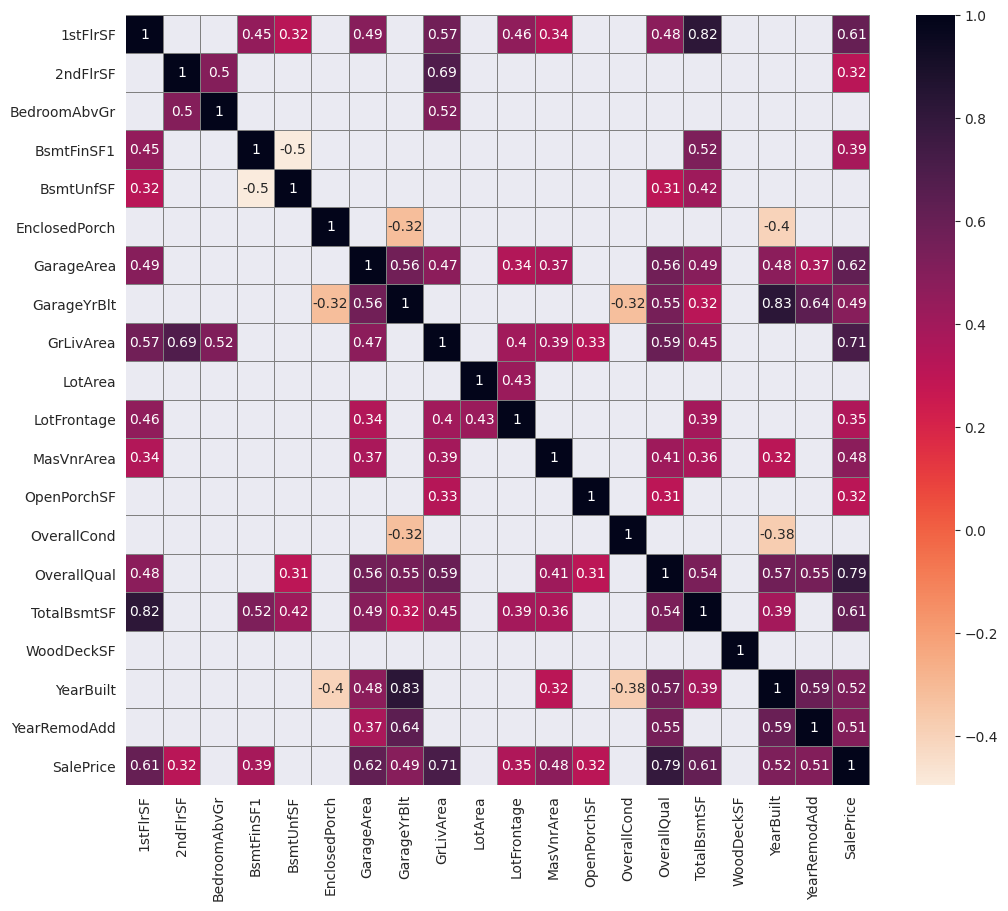



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



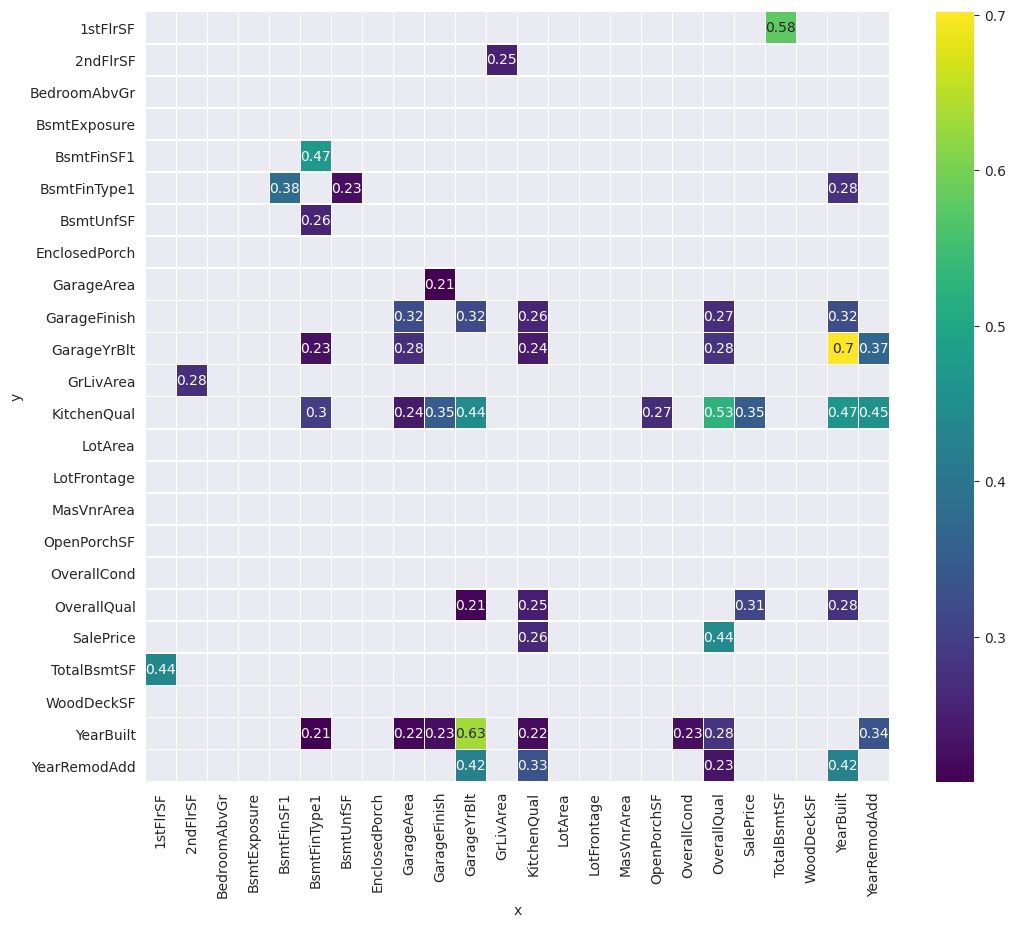

In [9]:
display_correlation_and_pps(pearson_corr = pearson_corr,
                  spearman_corr = spearman_corr,
                  pps_matrix = pps_matrix,
                  corr_threshold = 0.3, pps_threshold = 0.2,
                  figsize=(12,10), font_size = 10)

---

# Reports on missing data:

In [10]:
vars_with_missing_data = data.columns[data.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [12]:
# Ensure the list is not empty before creating the profile report
if vars_with_missing_data:
    # Creating a ProfileReport with minimal configuration
    profile = ProfileReport(data[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("No variables with missing data.")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
def EvaluateMissingData(data):
    # Calculate the absolute number of missing values in each column
    missing_data_absolute = data.isnull().sum()
    
    # Calculate the percentage of missing values in each column
    missing_data_percentage = round(missing_data_absolute/len(data)*100, 2)
    
    # Create a DataFrame to store the results
    df_missing_data = (pd.DataFrame(
        data={"RowsWithMissingData": missing_data_absolute,  # Absolute number of missing values
              "PercentageOfDataset": missing_data_percentage,  # Percentage of missing values
              "DataType": data.dtypes}  # Data type of each column
    )
                       .sort_values(by=['PercentageOfDataset'], ascending=False)  # Sort by percentage of missing values in descending order
                       .query("PercentageOfDataset > 0")  # Filter out columns with no missing values
                      )
    return df_missing_data
    

In [14]:
EvaluateMissingData(data)

RowsWithMissingData  PercentageOfDataset DataType
EnclosedPorch                 1324                90.68  float64
WoodDeckSF                    1305                89.38  float64
LotFrontage                    259                17.74  float64
GarageFinish                   162                11.10   object
BsmtFinType1                   114                 7.81   object
BedroomAbvGr                    99                 6.78  float64
2ndFlrSF                        86                 5.89  float64
GarageYrBlt                     81                 5.55  float64
MasVnrArea                       8                 0.55  float64

Columns in DataFrame: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


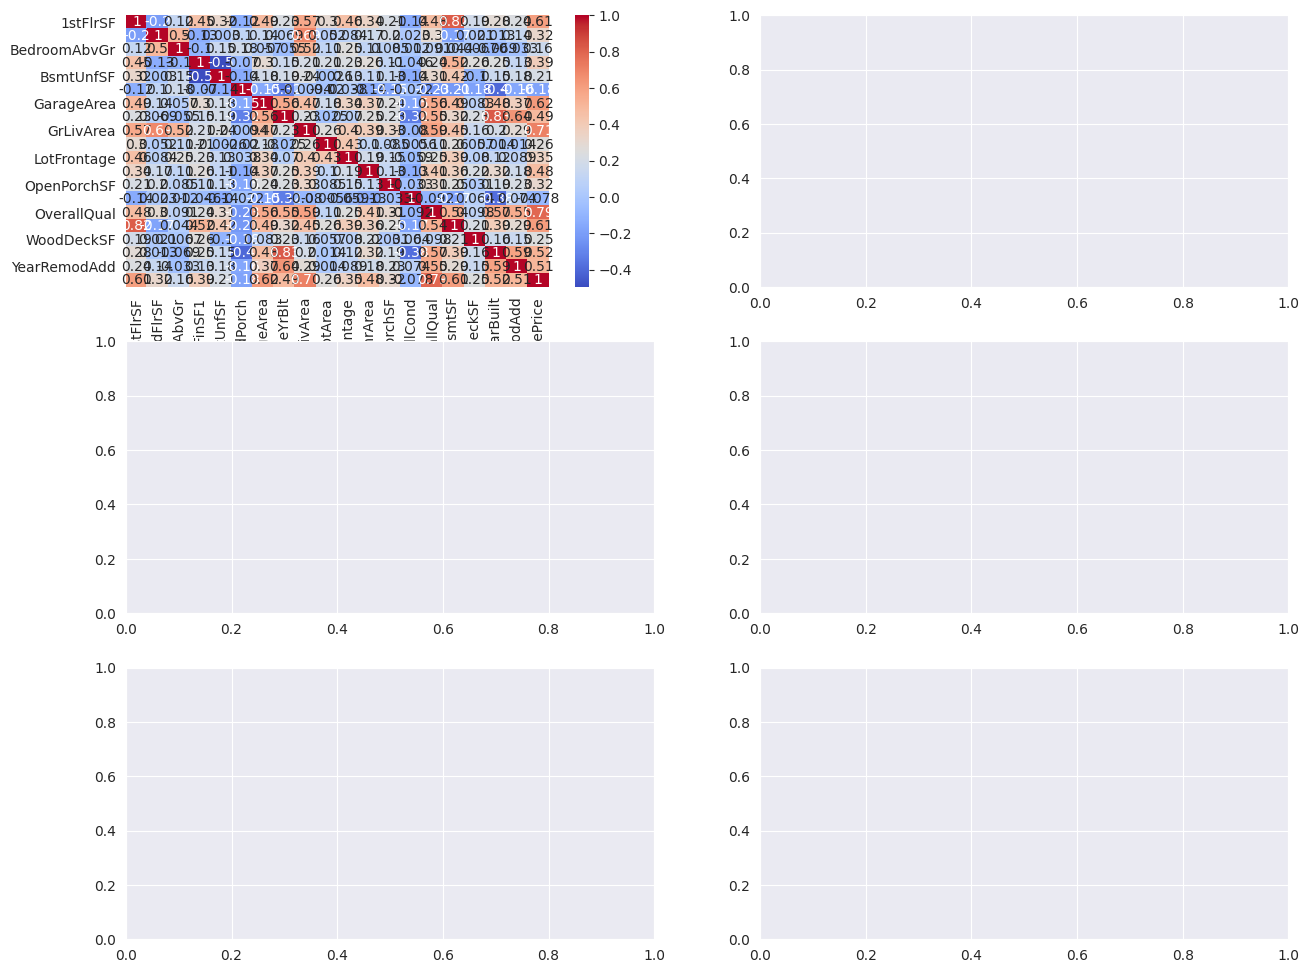

In [32]:
# Function to inspect DataFrame columns
def inspect_columns(data):
    print("Columns in DataFrame:", data.columns.tolist())

# Check if 'BsmtFinType1' exists in the DataFrame
def fill_missing_values(data, column_name, fill_value):
    if column_name in data.columns:
        data[column_name] = data[column_name].fillna(fill_value)
    else:
        print(f"Warning: Column '{column_name}' does not exist in the DataFrame.")

# Inspect columns in the DataFrame
inspect_columns(data)

# Fill missing values in specific columns
fill_missing_values(data, 'BsmtFinType1', 'Missing')
fill_missing_values(data, 'GarageFinish', 'Missing')

# Example plot setup (using existing columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
sns.heatmap(data.corr(), ax=axes[0, 0], annot=True, cmap='coolwarm')
plt.show()

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

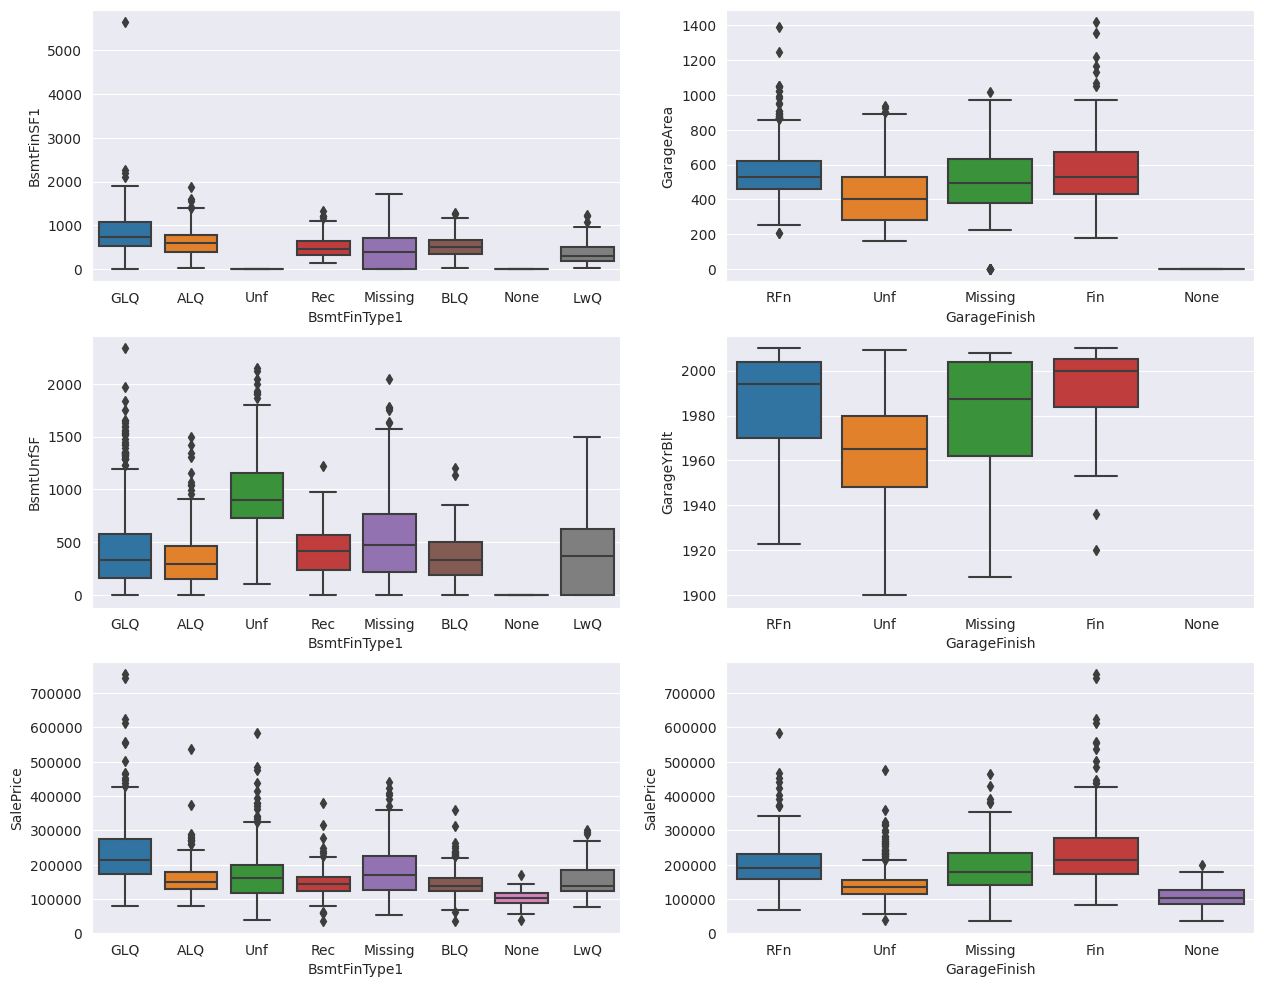

In [30]:
# Create a copy of the original data
df_missing = data.copy()

# Replace missing values in 'BsmtFinType1' and 'GarageFinish' with 'Missing'
df_missing['BsmtFinType1'] = df_missing['BsmtFinType1'].fillna('Missing')
df_missing['GarageFinish'] = df_missing['GarageFinish'].fillna('Missing')

# Create a figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,12))

# Create boxplots for 'BsmtFinType1'
sns.boxplot(data=df_missing, x='BsmtFinType1', y='BsmtFinSF1', ax=axes[0,0])  # Boxplot for 'BsmtFinSF1'
sns.boxplot(data=df_missing, x='BsmtFinType1', y='BsmtUnfSF', ax=axes[1,0])  # Boxplot for 'BsmtUnfSF'
sns.boxplot(data=df_missing, x='BsmtFinType1', y='SalePrice', ax=axes[2,0])  # Boxplot for 'SalePrice'

# Create boxplots for 'GarageFinish'
sns.boxplot(data=df_missing, x='GarageFinish', y='GarageArea', ax=axes[0,1])  # Boxplot for 'GarageArea'
sns.boxplot(data=df_missing, x='GarageFinish', y='GarageYrBlt', ax=axes[1,1])  # Boxplot for 'GarageYrBlt'
sns.boxplot(data=df_missing, x='GarageFinish', y='SalePrice', ax=axes[2,1])  # Boxplot for 'SalePrice'

In [27]:
def analyze_data_cleaning_effect(original_df, cleaned_df, variables_to_check):
    # Initialize plot number
    plot_number = 1  

    # Identify categorical variables
    categorical_vars = original_df.select_dtypes(exclude=['number']).columns 

    # Iterate over specified variables
    for variables in [variables_to_check]:
        print("\n=====================================================================================")
        print(f"* Distribution Effect Analysis Post Data Cleaning on the following variables:")
        print(f"{variables} \n\n")
    
        # Iterate over each variable
        for variable in variables:
            if variable in categorical_vars:  # If categorical, create barplot
                # Combine original and cleaned data
                df_original = pd.DataFrame({"Type": "Original", "Value": original_df[variable]})
                df_cleaned = pd.DataFrame({"Type": "Cleaned", "Value": cleaned_df[variable]})
                combined_df = pd.concat([df_original, df_cleaned], axis=0)
                
                # Create barplot
                fig, ax = plt.subplots(figsize=(15, 5))
                sns.countplot(hue='Type', data=combined_df, x="Value", palette=['blue', 'red'], ax=ax)
                ax.set(title=f"Distribution Plot {plot_number}: {variable}")
                plt.xticks(rotation=90)
                plt.legend()

            else:  # If numerical, create histogram
                # Create histogram
                fig, ax = plt.subplots(figsize=(10, 5))
                sns.histplot(data=original_df, x=variable, color='blue', label='Original', kde=True, element="step", ax=ax)
                sns.histplot(data=cleaned_df, x=variable, color='red', label='Cleaned', kde=True, element="step", ax=ax)
                ax.set(title=f"Distribution Plot {plot_number}: {variable}")
                plt.legend()

            # Display plot
            plt.show()
            plot_number += 1

# Drop Variables 

In [28]:
# Import the DropFeatures class from the feature_engine library
from feature_engine.selection import DropFeatures

# Define a list of variables that will be dropped from the dataset
variables_method = ['EnclosedPorch', 'WoodDeckSF']

# Print the list of variables to be dropped (not necessary, but can be useful for debugging)
print(variables_method)

# Create an instance of the DropFeatures class
# The features to be dropped are specified using the 'features_to_drop' parameter
imputer = DropFeatures(features_to_drop=variables_method)

# Fit the DropFeatures instance to the data and transform the data by dropping the specified features
# The resulting DataFrame is stored in df_method
df_method = imputer.fit_transform(data)

# Display the first 5 rows of the resulting DataFrame
df_method.head(5)

['EnclosedPorch', 'WoodDeckSF']


1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       NaN           NaN           No         216          ALQ   
4      1145       NaN           4.0           Av         655          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn       2003.0  ...     8450        65.0   
1        284         460          RFn       1976.0  ...     9600        80.0   
2        434         608          RFn       2001.0  ...    11250        68.0   
3        540         642          Unf       1998.0  ...     9550        60.0   
4        490         836          RFn       2000.0  ...    14260        84.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       196.0           61            5            7          856       2003   
1         0.0            0            8            6         1262       1976   
2       162.0           42            5            7          920       2001   
3         0.0           35            5            7          756       1915   
4       350.0           84            5            8         1145       2000   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  
3          1970     140000  
4          2000     250000  

[5 rows x 22 columns]

['2ndFlrSF', 'MasVnrArea']

* Distribution Effect Analysis Post Data Cleaning on the following variables:
['2ndFlrSF', 'MasVnrArea'] 




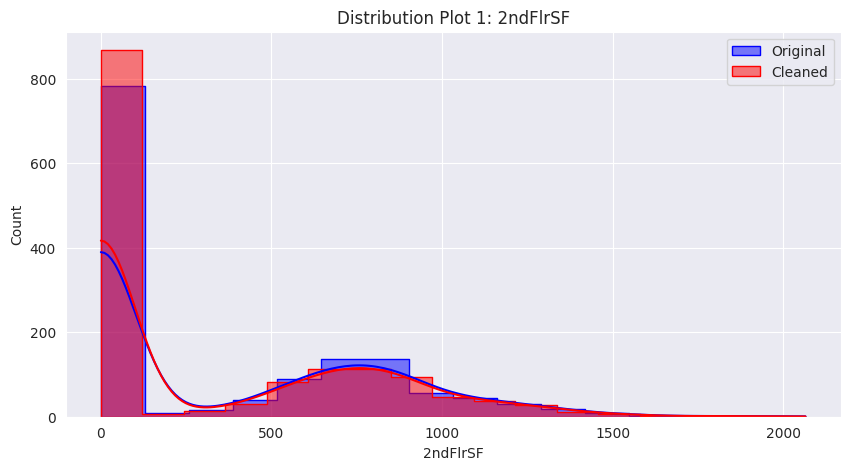

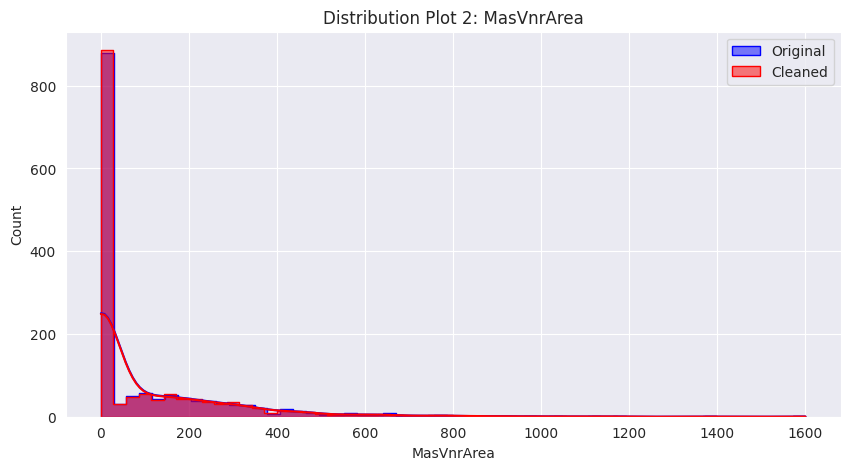

In [29]:
# Import the ArbitraryNumberImputer class from the feature_engine library
from feature_engine.imputation import ArbitraryNumberImputer

# Define a list of variables that will be imputed using the ArbitraryNumberImputer
variables_method = ['2ndFlrSF', 'MasVnrArea']

# Print the list of variables to be imputed (not necessary, but can be useful for debugging)
print(variables_method)

# Create an instance of the ArbitraryNumberImputer class
# The arbitrary number is set to 0, which means that missing values will be replaced with 0
# The variables to be imputed are specified using the 'variables' parameter
imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=variables_method)

# Fit the imputer to the data and transform the data by imputing missing values
# The resulting DataFrame is stored in df_method
df_method = imputer.fit_transform(data)

# Analyze the effect of data cleaning on the specified variables
# The original data is passed as 'original_df', the cleaned data is passed as 'cleaned_df'
# The variables to be checked are specified using the 'variables_to_check' parameter
analyze_data_cleaning_effect(original_df=data,
                   cleaned_df=df_method,
                   variables_to_check=variables_method)

---

['BsmtFinType1', 'GarageFinish']

* Distribution Effect Analysis Post Data Cleaning on the following variables:
['BsmtFinType1', 'GarageFinish'] 




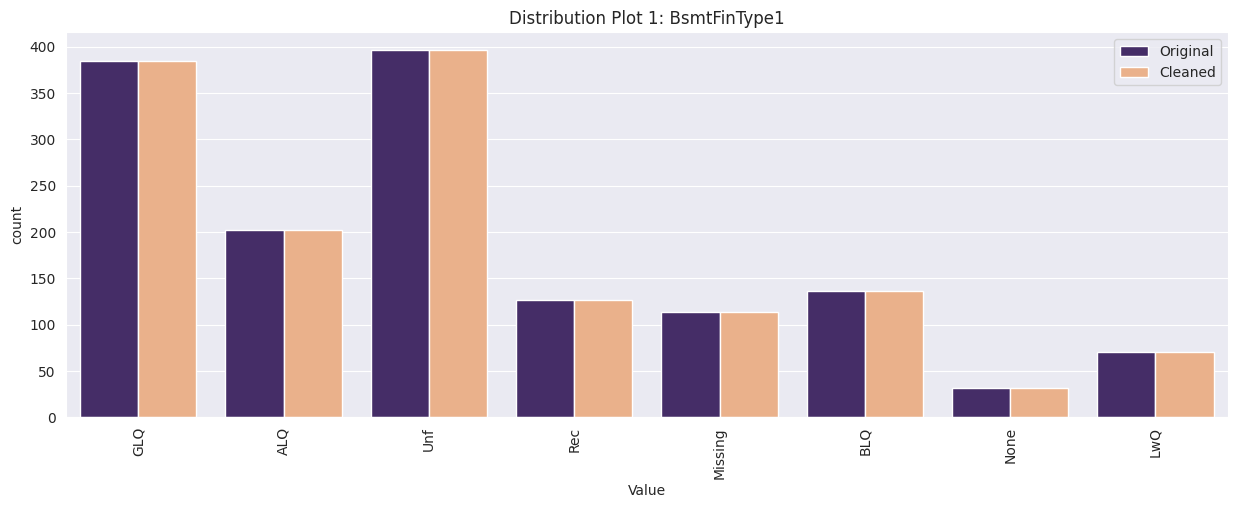

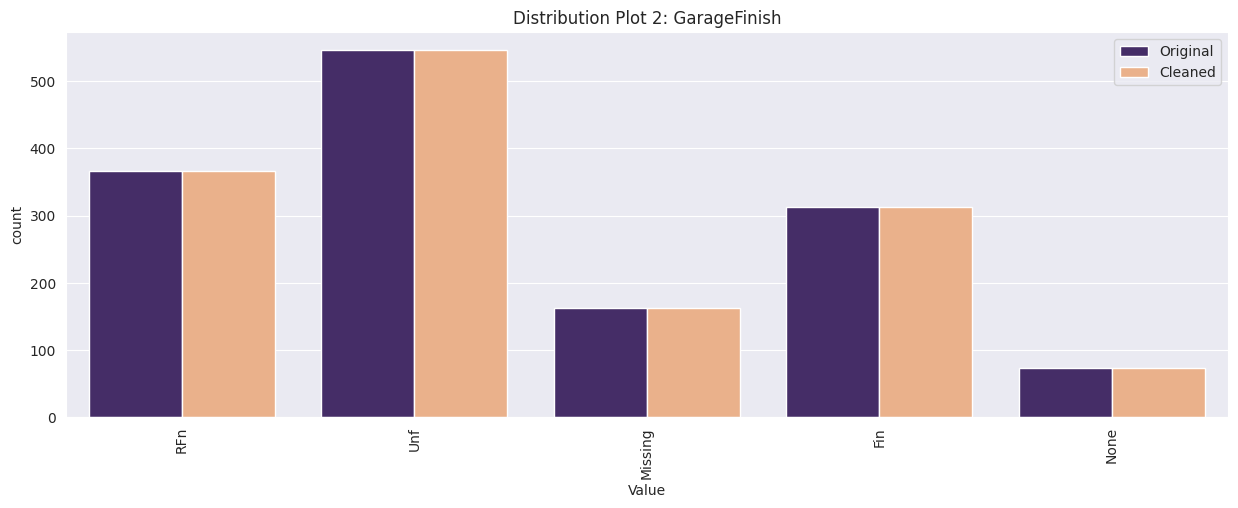

In [24]:
# Import the CategoricalImputer class from the feature_engine library
from feature_engine.imputation import CategoricalImputer

# Define a list of variables that will be imputed using the CategoricalImputer
variables_method = ['BsmtFinType1', 'GarageFinish']

# Print the list of variables to be imputed (not necessary, but can be useful for debugging)
print(variables_method)

# Create an instance of the CategoricalImputer class
# The imputation method is set to 'missing', which means that missing values will be imputed
# The fill value is set to 'Unf', which means that missing values will be replaced with 'Unf'
# The variables to be imputed are specified using the 'variables' parameter
imputer = CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=variables_method)

# Fit the imputer to the data and transform the data by imputing missing values
# The resulting DataFrame is stored in df_method
df_method = imputer.fit_transform(data)

# Analyze the effect of data cleaning on the specified variables
# The original data is passed as 'original_df', the cleaned data is passed as 'cleaned_df'
# The variables to be checked are specified using the 'variables_to_check' parameter
analyze_data_cleaning_effect(original_df=data,
                   cleaned_df=df_method,
                   variables_to_check=variables_method)


* Distribution Effect Analysis Post Data Cleaning on the following variables:
['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage'] 




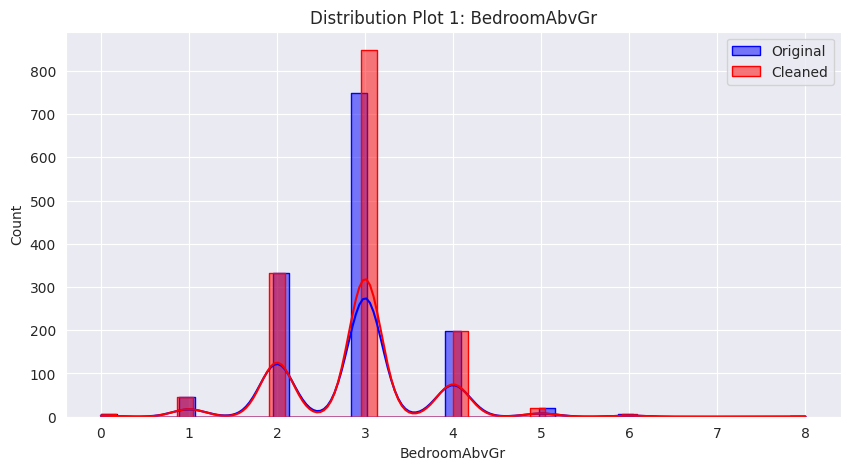

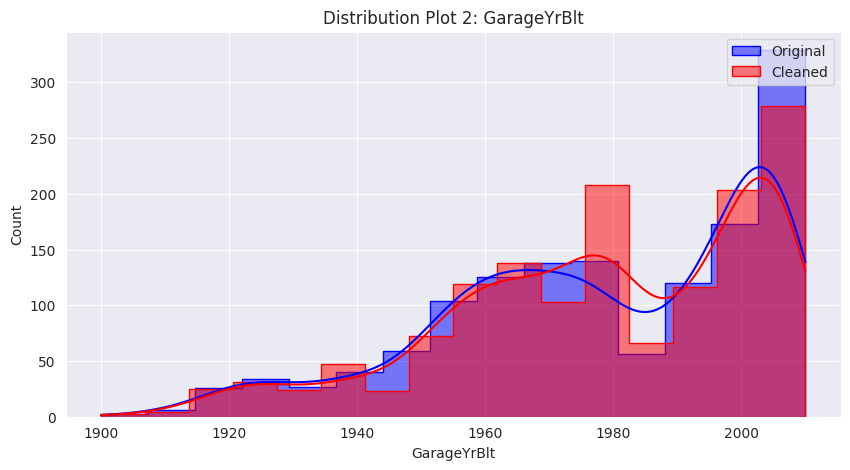

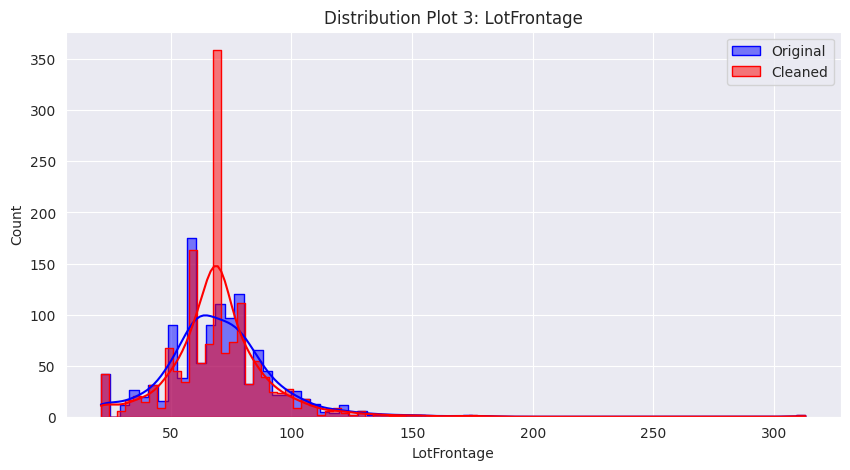

In [35]:
from feature_engine.imputation import MeanMedianImputer

# Define the list of variables to impute using the median method
variables_method = ['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage']

# Create a MeanMedianImputer object with the median imputation method and the specified variables
imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)

# Fit the imputer to the data and transform it (i.e., impute the missing values)
df_method = imputer.fit_transform(data)

# Analyze the effect of data cleaning on the specified variables
analyze_data_cleaning_effect(original_df=data,
                   cleaned_df=df_method,
                   variables_to_check=variables_method)

In [37]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
TrainSet, TestSet, _, __ = train_test_split(
                                        data,  # Features (independent variables)
                                        data['SalePrice'],  # Target variable (dependent variable)
                                        test_size=0.2,  # Proportion of data to include in the test set
                                        random_state=0  # Seed for random number generation
                                    )

# Print the shapes of the training and testing sets
print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


In [38]:
# Drop Variables ['EnclosedPorch', 'WoodDeckSF']
variables_method = ['EnclosedPorch', 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet), imputer.transform(TestSet)

# ArbitraryNumberImputer 
variables_method = ['2ndFlrSF','MasVnrArea']
imputer = ArbitraryNumberImputer(arbitrary_number=0, variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet), imputer.transform(TestSet)

# CategoricalImputer
variables_method = ['BsmtFinType1', 'GarageFinish']
imputer = CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet), imputer.transform(TestSet)

# MeanMedianImputer
variables_method = ['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_method)
imputer.fit(TrainSet)
TrainSet, TestSet = imputer.transform(TrainSet), imputer.transform(TestSet)

This code evaluates the TrainSet for missing data, counts the number of variables with missing values, and displays the results in a DataFrame df_missing_data.

In [39]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
df_missing_data

* There are 0 variables with missing data 



Empty DataFrame
Columns: [RowsWithMissingData, PercentageOfDataset, DataType]
Index: []

In [41]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropFeatures
from feature_engine.imputation import MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import ArbitraryNumberImputer


# Create a pipeline to clean the data
data_cleaning_pipeline = Pipeline([
      # Drop 'EnclosedPorch' and 'WoodDeckSF' features
      ( 'DropFeatures', DropFeatures(features_to_drop=['EnclosedPorch', 'WoodDeckSF']) ),
      # Impute missing values in 'BedroomAbvGr', 'GarageYrBlt', 'LotFrontage' with median
      ( 'MeanMedianImputer', MeanMedianImputer(imputation_method='median', variables=['BedroomAbvGr', 'GarageYrBlt', 'LotFrontage']) ),
      # Impute missing values in 'BsmtFinType1', 'GarageFinish' with 'Unf'
      ( 'CategoricalImputer', CategoricalImputer(imputation_method='missing', fill_value='Unf', variables=['BsmtFinType1', 'GarageFinish']) ),
      # Impute missing values in '2ndFlrSF', 'MasVnrArea' with 0
      ( 'ArbitraryNumberImputer', ArbitraryNumberImputer(arbitrary_number=0, variables=['2ndFlrSF','MasVnrArea']) ),
])

# Apply the pipeline to the dataset
df = data_cleaning_pipeline.fit_transform(data)
df.head()  # Show the first few rows of the cleaned dataset


1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0           3.0           No         706          GLQ   
1      1262       0.0           3.0           Gd         978          ALQ   
2       920     866.0           3.0           Mn         486          GLQ   
3       961       0.0           3.0           No         216          ALQ   
4      1145       0.0           4.0           Av         655          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn       2003.0  ...     8450        65.0   
1        284         460          RFn       1976.0  ...     9600        80.0   
2        434         608          RFn       2001.0  ...    11250        68.0   
3        540         642          Unf       1998.0  ...     9550        60.0   
4        490         836          RFn       2000.0  ...    14260        84.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       196.0           61            5            7          856       2003   
1         0.0            0            8            6         1262       1976   
2       162.0           42            5            7          920       2001   
3         0.0           35            5            7          756       1915   
4       350.0           84            5            8         1145       2000   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  
3          1970     140000  
4          2000     250000  

[5 rows x 22 columns]

## Save Cleaned Train and Test Sets

In [42]:
try:
  # Create a folder to store the cleaned datasets
  os.makedirs('outputs/datasets/cleaned')
except Exception as e:
  # Print any error that occurs during folder creation
  print(e)

# Save the cleaned training set to a CSV file
TrainSet.to_csv("outputs/datasets/cleaned/train_set_cleaned.csv", index=False)

# Save the cleaned testing set to a CSV file
TestSet.to_csv("outputs/datasets/cleaned/test_set_cleaned.csv", index=False)

[Errno 17] File exists: 'outputs/datasets/cleaned'


# Push files to Repo

- Make git add.
- Git commit -m "-"
- Gita push (repo)